If we have a cascade of multiple blocks, as shown in @fig-noise-cascade, we can calculate the overall noise factor with the **Friis formula** [@Pozar_RF]

$$F_\mathrm{total} = 1 + (F_1 - 1) + \frac{F_2 - 1}{G_1} + \frac{F_3 - 1}{G_1 G_2}$$ {#eq-friis}

where $F_i$ and $G_i$ are the noise factor and power gain of the $i$-th block, respectively. Note that all gains have to be in linear units (not dB) when using @eq-friis. We can interpret @eq-friis as follows:

- The overall noise factor $F_\mathrm{total}$ is always larger than or equal to the noise factor of the first block ($F_1$).
- The noise factor of the first block is the most important one, as the noise factors of the following blocks are reduced by the gain of all preceding blocks. This is especially important in RF receivers, where the first block is usually a low-noise amplifier (LNA) with a very low noise figure (e.g., 1 dB or less) and a high gain (e.g., 10 dB or more). This ensures that the noise of the following blocks is negligible.
- The noise factor of the last block is reduced by the gain of all preceding blocks, so it is usually not very important.

Here we also see a trade-off between noise and linearity, as shown by @eq-iip3-cascade and @eq-friis. For low noise, we should try to maximize $G_1$, however, this will affect linearity (IIP3) in a negative way. As in many other situation in RF design, we have to find a good compromise between conflicting requirements.


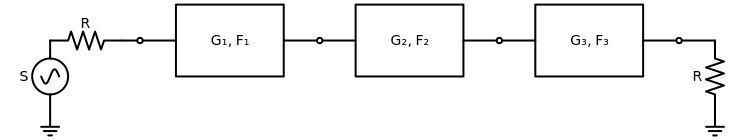

In [3]:
# see https://iic-jku.github.io/radio-frequency-integrated-circuits/rfic.html#sec-noise

import schemdraw 
from schemdraw.elements import *
import schemdraw.dsp as dsp

with schemdraw.Drawing(canvas='svg') as d:
    d.config(unit=2)
    d.config(fontsize=14)

    Ground()
    Vn = SourceSin().up().label(r'$S_{in}$')
    Rs = Resistor().right().label(r'$R_{s}$')
    
    Line().right().length(d.unit*0.25)
    Dot(open=True)
    Line().right().length(d.unit*0.5)

    dsp.Box().label(r'$G_1$, $F_1$')

    Line().right().length(d.unit*0.5)
    Dot(open=True)
    Line().right().length(d.unit*0.5)
    
    dsp.Box().label(r'$G_2$, $F_2$')

    Line().right().length(d.unit*0.5)
    Dot(open=True)
    Line().right().length(d.unit*0.5)
    
    dsp.Box().label(r'$G_3$, $F_3$')

    Line().right().length(d.unit*0.5)
    Dot(open=True)
    Line().right().length(d.unit*0.5)
    Rl = Resistor().down().label(r'$R_{load}$')
    Ground()